# Polynomial Regression

What if your data doesn't look linear at all? Let's look at some more realistic-looking page speed / purchase data:

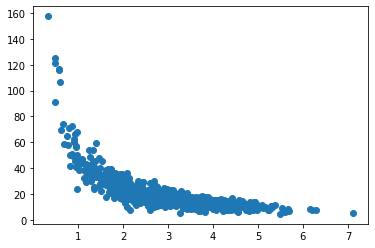

In [5]:
%matplotlib inline
from pylab import *
import numpy as np

np.random.seed(2)
pageSpeeds = np.random.normal(3.0, 1.0, 1000)
purchaseAmount = np.random.normal(50.0, 10.0, 1000) / pageSpeeds

scatter(pageSpeeds, purchaseAmount)

numpy has a handy polyfit function we can use, to let us construct an nth-degree polynomial model of our data that minimizes squared error. Let's try it with a 4th degree polynomial:

In [6]:
x = np.array(pageSpeeds)
y = np.array(purchaseAmount)

p4 = np.poly1d(np.polyfit(x, y, 4)) # np.poly1d(np.polyfit()) returns a polynomial f(x)


We'll visualize our original scatter plot, together with a plot of our predicted values using the polynomial for page speed times ranging from 0-7 seconds:

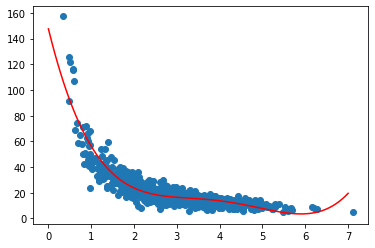

In [9]:
import matplotlib.pyplot as plt

xp = np.linspace(0, 7, 100) #xp are points on X axis that are to be plotted 
plt.scatter(x, y)
plt.plot(xp, p4(xp), c='r') #p4(xp)=y, as y=f(x)
plt.show()

Looks pretty good! Let's measure the r-squared error:

In [10]:
from sklearn.metrics import r2_score

r2 = r2_score(y, p4(x)) # r2_score() compares a set of observations to a set of predictions generally y, f(x)

print(r2)


0.82937663963


## Activity

Try different polynomial orders. Can you get a better fit with higher orders? Do you start to see overfitting, even though the r-squared score looks good for this particular data set?

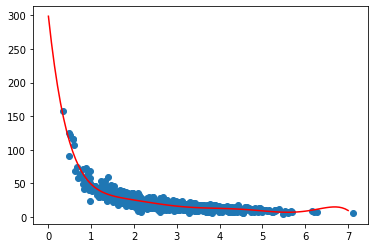

In [19]:
p5 = np.poly1d(np.polyfit(x,y,7))
xpp = np.linspace(0, 7, 100) 
plt.scatter(x, y)
plt.plot(xpp, p5(xpp), c='r') 
plt.show()

In [20]:
r3 = r2_score(y, p5(x))
print(r3)

0.877836978171


Overfitting starts at order 6 although r2_score is good but its not useful I guess